# Zillow (ZHVI): Time_Series

## Import Necessary Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Permanently changes the pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 7)

from sklearn import set_config
set_config(display='diagram')

# display values with two decimal places and comma separation for powers of thousands.
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

## Functions

In [64]:
# format ticks
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats unit in thousands"""
    new_x = x/1_000
    return f'{new_x:,.0f}K'

## Load the Data

In [2]:
# Import the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df_OE = pd.read_csv(url)
df_OE.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00","257,207.00","260,310.00","263,204.00","266,206.00","269,324.00","272,045.00","274,610.00","277,439.00","280,925.00","284,072.00","287,118.00","289,892.00","293,193.00","296,389.00","299,302.00","302,120.00","304,740.00","307,580.00","309,783.00","312,162.00","314,868.00","318,074.00","321,528.00","323,675.00","323,070.00","321,943.00",NaN,"324,148.00","326,758.00","330,210.00","333,453.00","336,666.00","338,838.00","341,000.00","343,228.00","346,501.00","350,643.00","355,426.00","360,063.00","365,359.00","369,589.00","373,404.00","375,975.00","378,964.00","382,001.00","385,034.00","388,643.00","392,144.00","395,659.00","398,641.00","402,494.00","406,543.00","411,545.00","415,806.00","421,448.00","427,436.00","434,280.00","440,351.00","445,083.00","449,783.00","455,706.00","462,730.00","469,737.00","474

In [108]:
df = df_OE.copy()

## Prepare DataFrame

In [109]:
# We will only use the four (4) largest cities in our analysis
#city_range = list(range(0,4))

df_wide0 = df[df['SizeRank'] == 0]
df_wide1 = df[df['SizeRank'] == 1]
df_wide2 = df[df['SizeRank'] == 2]
df_wide3 = df[df['SizeRank'] == 3]

df_wide = pd.concat([df_wide0, df_wide1, df_wide2, df_wide3], axis=0)
df_wide

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00","257,207.00","260,310.00","263,204.00","266,206.00","269,324.00","272,045.00","274,610.00","277,439.00","280,925.00","284,072.00","287,118.00","289,892.00","293,193.00","296,389.00","299,302.00","302,120.00","304,740.00","307,580.00","309,783.00","312,162.00","314,868.00","318,074.00","321,528.00","323,675.00","323,070.00","321,943.00",NaN,"324,148.00","326,758.00","330,210.00","333,453.00","336,666.00","338,838.00","341,000.00","343,228.00","346,501.00","350,643.00","355,426.00","360,063.00","365,359.00","369,589.00","373,404.00","375,975.00","378,964.00","382,001.00","385,034.00","388,643.00","392,144.00","395,659.00","398,641.00","402,494.00","406,543.00","411,545.00","415,806.00","421,448.00","427,436.00","434,280.00","440,351.00","445,083.00","449,783.00","455,706.00","462,730.00","469,737.00","474

In [110]:
# Melt the data into long-form
df_long = pd.melt(
    df_wide.drop(columns=['RegionID','SizeRank','RegionType','StateName','Metro','CountyName']),
    id_vars=['RegionName','State'],
    value_name='HomeValue',
    var_name='Date')
df_long

,RegionName,State,Date,HomeValue
0,New York,NY,2000-01-31,"253,690.00"
1,Los Angeles,CA,2000-01-31,"234,181.00"
2,Houston,TX,2000-01-31,"109,068.00"
...,...,...,...,...
1089,Los Angeles,CA,2022-09-30,"966,595.00"
1090,Houston,TX,2022-09-30,"272,639.00"
1091,Chicago,IL,2022-09-30,"315,429.00"


In [111]:
# Convert melted dates into the datetime datatype
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [112]:
# Make 'Date' the index
df_long = df_long.set_index('Date')
df_long

,RegionName,State,HomeValue
Date,,,
2000-01-31,New York,NY,"253,690.00"
2000-01-31,Los Angeles,CA,"234,181.00"
2000-01-31,Houston,TX,"109,068.00"
...,...,...,...
2022-09-30,Los Angeles,CA,"966,595.00"
2022-09-30,Houston,TX,"272,639.00"
2022-09-30,Chicago,IL,"315,429.00"


In [113]:
# Resample dataframe as monthly frequency, grouped by City
df_ts = df_long.groupby('RegionName').resample('MS').sum(numeric_only='float')
df_ts

HomeValue
RegionName Date                 
Chicago    2000-01-01 166,139.00
           2000-02-01 166,536.00
           2000-03-01 167,368.00
...                          ...
New York   2022-07-01 777,692.00
           2022-08-01 779,960.00
           2022-09-01 781,622.00

[1092 rows x 1 columns]

## Visualizations

In [114]:
# Check for null values before plotting
df_ts.isna().sum()

HomeValue    0
dtype: int64

In [115]:
# Unstack df for plotting
unstacked = df_ts.unstack(level=0)
unstacked

HomeValue                                  
RegionName    Chicago    Houston Los Angeles   New York
Date                                                   
2000-01-01 166,139.00 109,068.00  234,181.00 253,690.00
2000-02-01 166,536.00 109,079.00  234,401.00 255,517.00
2000-03-01 167,368.00 108,878.00  235,513.00 257,207.00
...               ...        ...         ...        ...
2022-07-01 315,910.00 271,059.00  992,630.00 777,692.00
2022-08-01 315,587.00 272,400.00  978,196.00 779,960.00
2022-09-01 315,429.00 272,639.00  966,595.00 781,622.00

[273 rows x 4 columns]

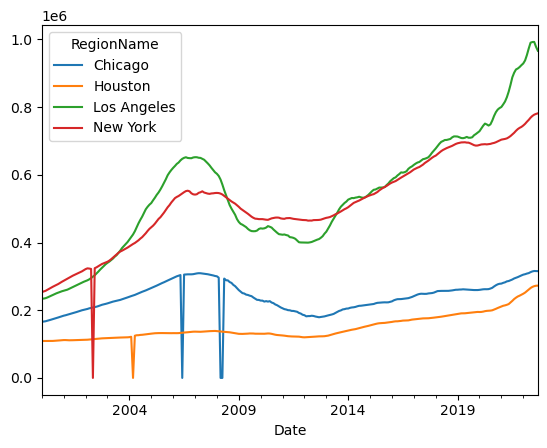

In [116]:
ax = unstacked['HomeValue'].plot()

In [117]:
fmt_thous = mticks.FuncFormatter(thousands)

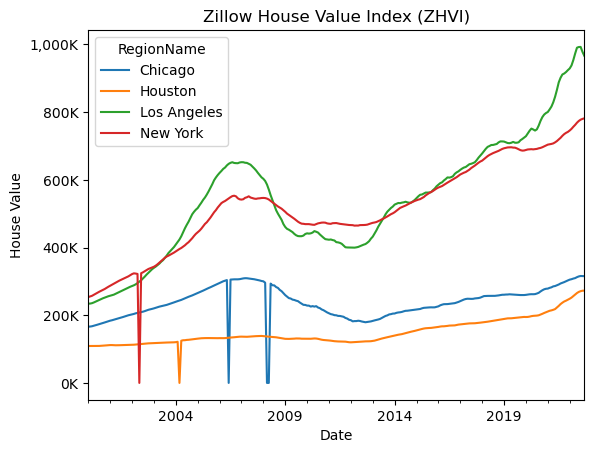

In [118]:
ax = unstacked['HomeValue'].plot(title='Zillow House Value Index (ZHVI)')
ax.yaxis.set_major_formatter(fmt_thous)
ax.set_ylabel('House Value');

## Questions

### Q1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [119]:
# New York had the highest Typical Home Value at the end of 2008
display(df_long.loc['2008-12'])
df_long.loc['2008-12']['HomeValue'].max()

,RegionName,State,HomeValue
Date,,,
2008-12-31,New York,NY,"510,309.00"
2008-12-31,Los Angeles,CA,"469,294.00"
2008-12-31,Houston,TX,"131,283.00"
2008-12-31,Chicago,IL,"265,306.00"


510309.0

In [120]:
# Houston had the lowest Typical Home Value at the end of 2008
display(df_long.loc['2008-12'])
df_long.loc['2008-12']['HomeValue'].min()

,RegionName,State,HomeValue
Date,,,
2008-12-31,New York,NY,"510,309.00"
2008-12-31,Los Angeles,CA,"469,294.00"
2008-12-31,Houston,TX,"131,283.00"
2008-12-31,Chicago,IL,"265,306.00"


131283.0

### Q2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [121]:
# Calculate the different values between each month
unstacked_diff = unstacked.diff()
unstacked_diff

HomeValue                              
RegionName   Chicago  Houston Los Angeles New York
Date                                              
2000-01-01       NaN      NaN         NaN      NaN
2000-02-01    397.00    11.00      220.00 1,827.00
2000-03-01    832.00  -201.00    1,112.00 1,690.00
...              ...      ...         ...      ...
2022-07-01  1,247.00 2,158.00      293.00 3,748.00
2022-08-01   -323.00 1,341.00  -14,434.00 2,268.00
2022-09-01   -158.00   239.00  -11,601.00 1,662.00

[273 rows x 4 columns]

In [122]:
# Show the change in value from November 2008 to December 2008
unstacked_diff.loc['2008-12']

HomeValue                              
RegionName   Chicago Houston Los Angeles  New York
Date                                              
2008-12-01 -5,753.00 -964.00  -12,611.00 -4,458.00